In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import time
plt.rcParams['figure.figsize'] = (13.0, 5.0)

# Testing optimizers

In [ ]:
def func(x):
    x1 = x[:,0]
    x2 = x[:,1]
    x3 = x[:,2]
    return 12.5*x1+0.5*x2*12+2*x3
x_train = torch.rand(10000,3)*50-25
y_train = func(x_train)
y_train = y_train.reshape(-1,1)

In [ ]:
x_val = torch.rand(500,3)*50-25
y_val = func(x_val)
y_val = y_val.reshape(-1,1)

In [ ]:
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(3,100)
        self.fc2 = torch.nn.Linear(100,100)
        self.fc3 = torch.nn.Linear(100,1)
        self.act1 = torch.nn.Softmax(dim = 1)
        self.act2 = torch.nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.act2(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x
net = Net()
optimizer = torch.optim.Adam(params = net.parameters(), lr = 1e-3)

loss = lambda x, y: (x**2-y**2).abs().mean()

In [ ]:
for epoch in range(50001):
    optimizer.zero_grad()
    y_pred = net.forward(x_train)
    loss_val = loss(y_pred, y_train)
    loss_val.backward()
    optimizer.step()
    if epoch%50 == 0:
        print(loss(net.forward(x_train), y_train).data,
              loss(net.forward(x_val), y_val).data)

# Number classification

In [2]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [3]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [14]:
x_train = MNIST_train.train_data.float()
y_train = MNIST_train.train_labels
x_test = MNIST_test.test_data.float()
y_test = MNIST_test.test_labels

C:\Users\Никита\AppData\Roaming\Python\Python311\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\Users\Никита\AppData\Roaming\Python\Python311\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
C:\Users\Никита\AppData\Roaming\Python\Python311\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\Никита\AppData\Roaming\Python\Python311\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [21]:
x_train = x_train.reshape([-1,28**2])
x_test = x_test.reshape([-1,28**2])

In [22]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [23]:
class Numeric_net(torch.nn.Module):
    def __init__(self, n):
        super().__init__()
        self.fc1 = torch.nn.Linear(28*28, n)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n,10)
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

In [8]:
net = Numeric_net(100).to(device)
optimizer = torch.optim.Adam(params = net.parameters(), lr = 1e-3)
loss = torch.nn.CrossEntropyLoss()
x_train = x_train.to(device)
x_test = x_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [29]:
batch_size = 100
train_acc_history = []
test_acc_history = []
set_len = x_train.shape[0]
for epoch in range(5001):
    batch_order = np.random.permutation(x_train.shape[0])
    for start_batch in range(0,x_train.shape[0],batch_size):
        optimizer.zero_grad()
        batch_inds = batch_order[start_batch:start_batch+batch_size]
        x_batch = x_train[batch_inds].to(device)
        y_batch = y_train[batch_inds].to(device)
        y_batch_pred = net.forward(x_batch)
        loss_val = loss(y_batch_pred, y_batch)
        loss_val.backward()
        optimizer.step()
    acc_train = (y_train_pred == y_train).float().mean()
    acc_test = (y_test_pred == y_test).float().mean()
    if epoch%10 == 0:
        y_train_pred = net.forward(x_train).argmax(dim=1)
        y_test_pred = net.forward(x_test).argmax(dim=1)
        print(f'epoch: {epoch}; train ds: {float(acc_train.data)}; test ds: {float(acc_test.data)}')
    train_acc_history.append(acc_train.data.cpu())
    test_acc_history.append(acc_test.data.cpu())

epoch: 0; train ds: 0.9812833666801453; test ds: 0.9678999781608582
epoch: 10; train ds: 0.9812833666801453; test ds: 0.9681999683380127


KeyboardInterrupt: ignored

(0.0, 10.0, 0.0, 1.0)

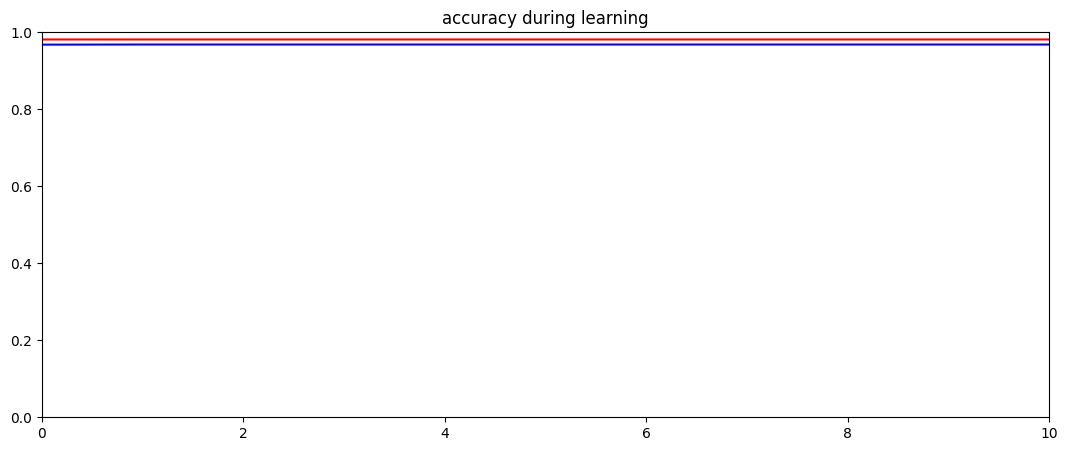

In [33]:
plt.plot(train_acc_history, '-', c='red')
plt.plot(test_acc_history, '-', c='blue')
plt.title('accuracy during learning')
plt.axis((0,10,0,1))

tensor([10., 11., 12.])